# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [1]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

1.   Yes RGB has 3 channels whereas, Grayscale has 1 channel.
2.   Both Numpy Weighted Average and cvtColor function give identical results

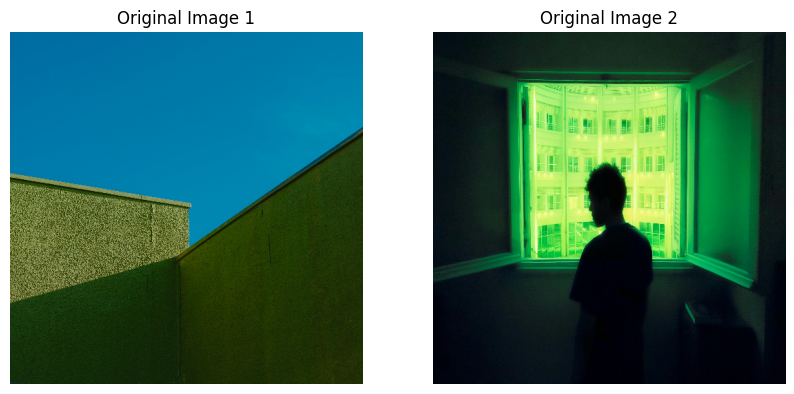

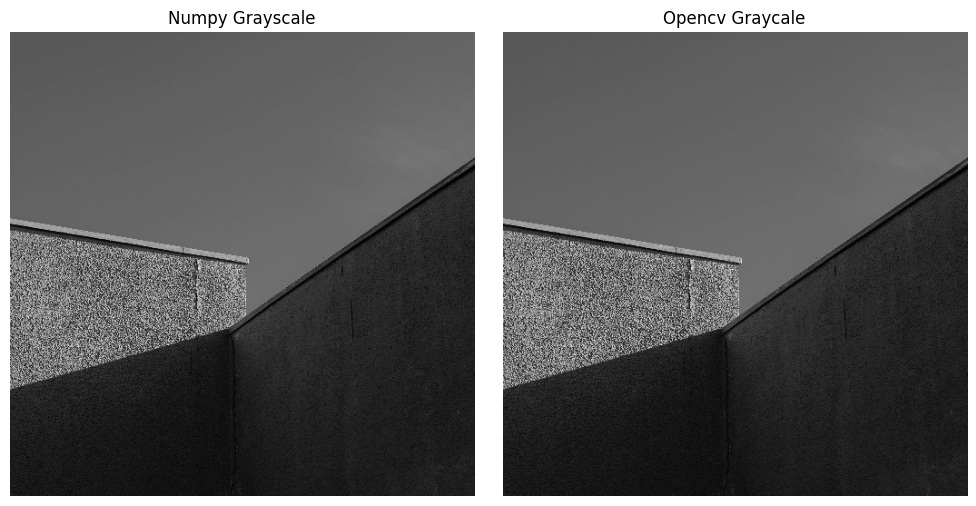

Shape of RGB= (512, 512, 3)
Shape of Grayscale= (512, 512)
[  0. 107. 161.]
0.0 *0.299+ 107.0 *0.587+ 161.0 *0.114= 81


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im=cv.imread('image.jpg') #loaded images inside code
img=cv.imread('image1.jpg')
x=im[:,:,::-1] #converted BGR(default opencv) to RGB
y=img[:,:,::-1]
x=cv.resize(x,(512,512)) #resized for less memory taken in google colab
y=cv.resize(y,(512,512))
x=np.float32(x) #uses 1/2 memory of default float64 of numpy
y=np.float32(y)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x.astype(np.uint8))
plt.title("Original Image 1")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(y.astype(np.uint8))
plt.title("Original Image 2")
plt.axis('off')
plt.tight_layout
plt.show()
gray=(x[:,:,0]*0.299+x[:,:,1]*0.587+x[:,:,2]*0.114).astype(np.uint8) #grayscale done using weighted average in numpy
x1=cv.cvtColor(x,cv.COLOR_RGB2GRAY) #grayscale using cvtColor function in opencv
y1=cv.cvtColor(y,cv.COLOR_RGB2GRAY)
plt.figure(figsize=(10,5))
# --- First Image (Left) ---
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray') #plotting image
plt.title("Numpy Grayscale")
plt.axis('off')
# --- Second Image (Right) ---
plt.subplot(1,2,2)
plt.imshow(x1,cmap='gray') #plotting image
plt.title("Opencv Graycale")
plt.axis('off')
plt.tight_layout()
plt.show()
print("Shape of RGB=",x.shape) #shape of RGB
print("Shape of Grayscale=",gray.shape) #shape of Grayscale
print(x[0,0]) #This is one row which has RGB values at that pixel
print(x[0,0,0],"*0.299+",x[0,0,1],"*0.587+",x[0,0,2],"*0.114=",gray[0,0]) #This is that pixel value in Grayscale


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [3]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

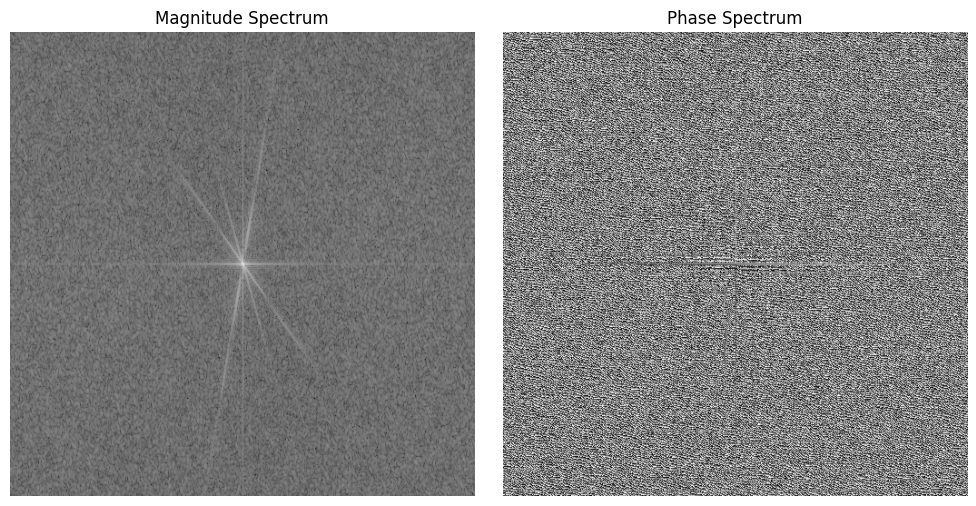

In [4]:
i2_fft=np.fft.fft2(gray) #did step 1 on Grayscaled image
fshift=np.fft.fftshift(i2_fft) #did step 2 and 3
magnitude_spectrum = 20*np.log(np.abs(fshift)+1) #formula for magnitude spectrum applied which scales absolute values such that all are visible
phase_spectrum = np.angle(fshift) #formula for phase applied(note it is a vector in argand plane)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(magnitude_spectrum,cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(phase_spectrum,cmap='gray')
plt.title("Phase Spectrum")
plt.axis('off')
plt.tight_layout()
plt.show()


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [5]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

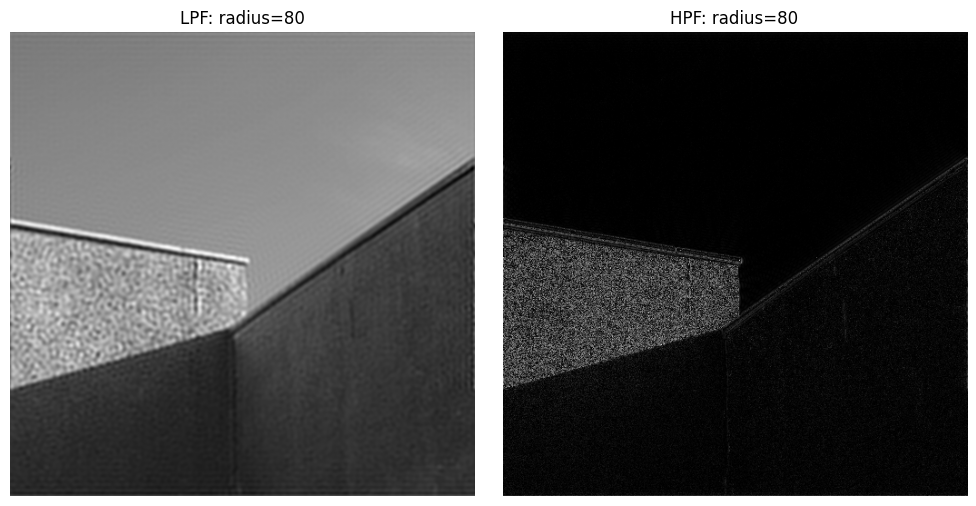

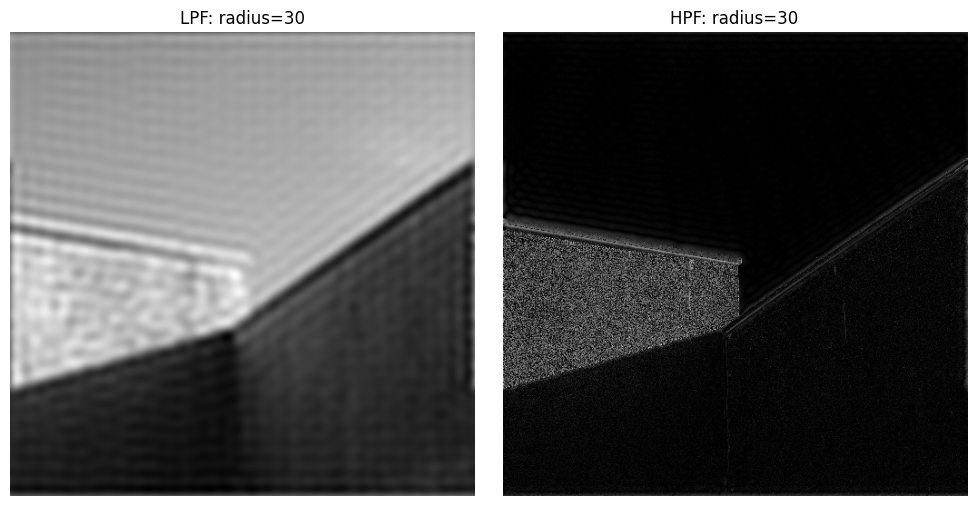

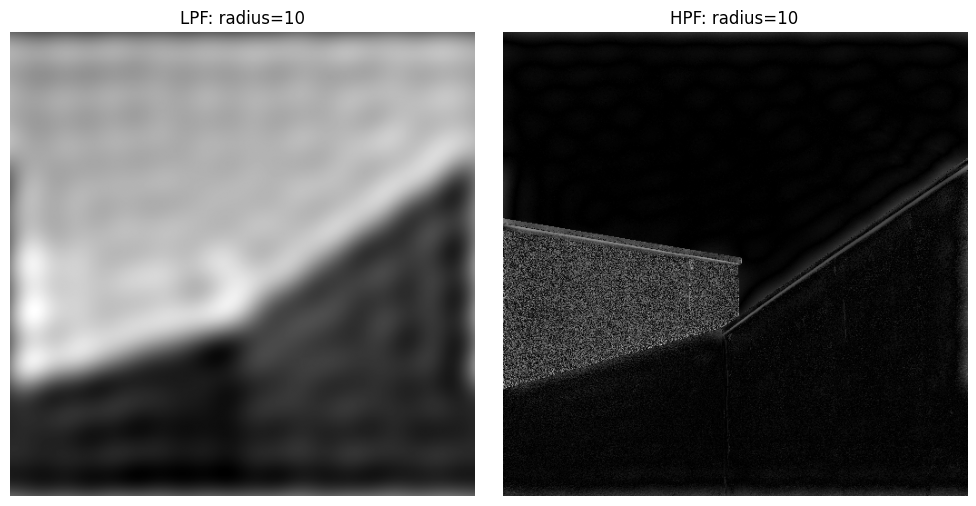

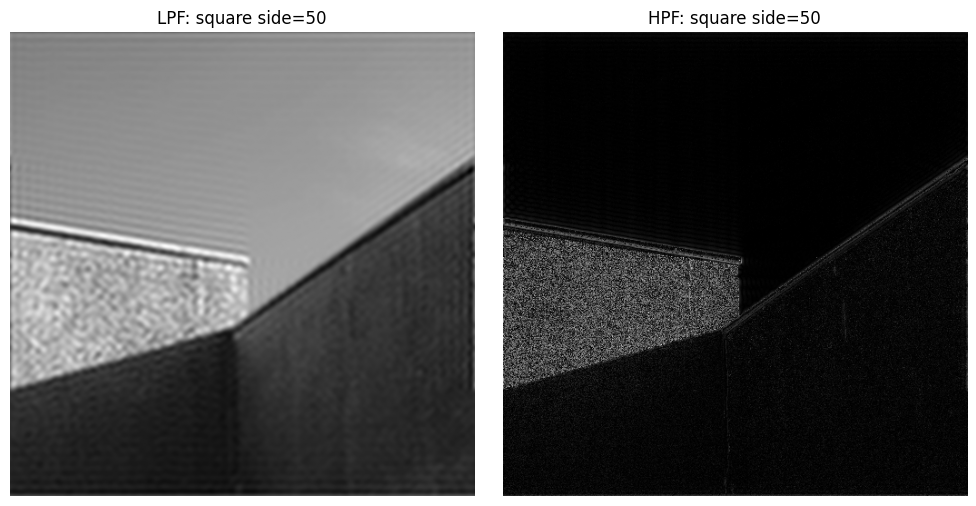

In [6]:
# Low Pass Mask
rows,cols= gray.shape
crow,ccol=rows//2,cols//2
radius=[80,30,10,50] #radius+square size
for i in range(4): #done for 4 required size
    mask_lpf=np.zeros((rows,cols),np.uint8) #created zero matrix
    if i<3:
      cv.circle(mask_lpf,(ccol,crow),radius[i],1,-1) #setting circle of radius given and centering it
      mask_info=f"radius={radius[i]}"
    else:
      mask_lpf[crow-radius[i]:crow+radius[i],ccol-radius[i]:ccol+radius[i]]=1 #setting square of given size and centering it
      mask_info=f"square side={radius[i]}"
    mask_hpf=1-mask_lpf # formula of hpf matrix
    #applying formulas
    f_lpf=fshift*mask_lpf
    f_hpf=fshift*mask_hpf
    #applying inverse fft to reconstruct
    ishift_lpf=np.fft.ifftshift(f_lpf)
    img_back_lpf=np.abs(np.fft.ifft2(ishift_lpf))
    ishift_hpf=np.fft.ifftshift(f_hpf)
    img_back_hpf=np.abs(np.fft.ifft2(ishift_hpf))
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(img_back_lpf,cmap='gray')
    plt.title(f"LPF: {mask_info}")
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(img_back_hpf,cmap='gray')
    plt.title(f"HPF: {mask_info}")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    #blur levels increase when we decrease radius because then we are ignoring all the high frequency present which are basis of edges. so no clear edges mean blurred image


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [7]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

1. This is done to normalize because one value is 10^6 one is just 1 so the computer when it displays we jsut see 10^6 and not 1 because of huge difference but if we take log then 10^6-->6 an 1-->0 so now they are comparable adn easily visible to eyes.

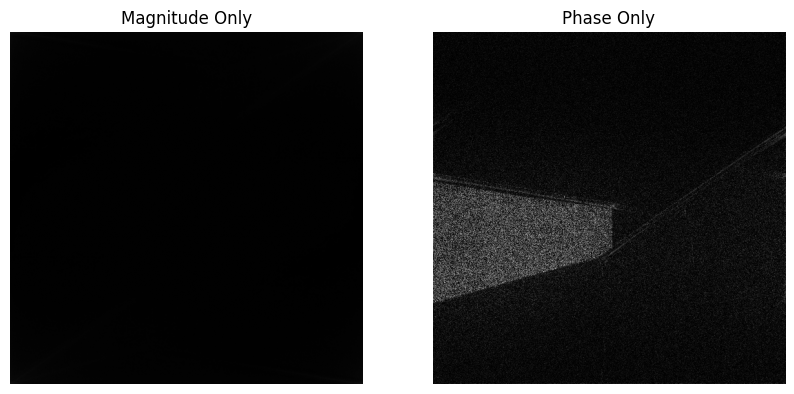

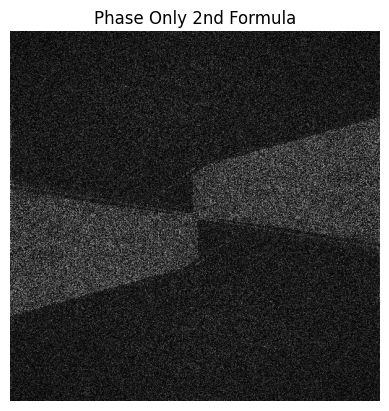

In [11]:
mag_only=np.abs(fshift) #magnitude only in absolute terms
phase_only=fshift/np.abs(fshift) #this is a unit vector(z/|z|)
#Magnitude-only reconstruction
ishift_mag=np.fft.ifftshift(mag_only)
img_back_mag=np.abs(np.fft.ifft2(ishift_mag))
#Phase-only reconstruction
ishift_phase=np.fft.ifftshift(phase_only)
img_back_phase=np.abs(np.fft.ifft2(ishift_phase))
#Phase 2nd formula reconstruction
ishift_phase1=np.fft.ifftshift(np.angle(fshift))#this takes just the angle that'w why distorted image is plottted
img_back_phase1=np.abs(np.fft.ifft2(ishift_phase1))
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_back_mag,cmap='gray')
plt.title("Magnitude Only")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_back_phase,cmap='gray')
plt.title("Phase Only")
plt.axis('off')
plt.tight_layout
plt.show()
plt.imshow(img_back_phase1,cmap='gray')
plt.title("Phase Only 2nd Formula")
plt.axis('off')
plt.tight_layout
plt.show()


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

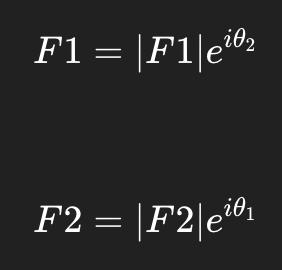

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [9]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

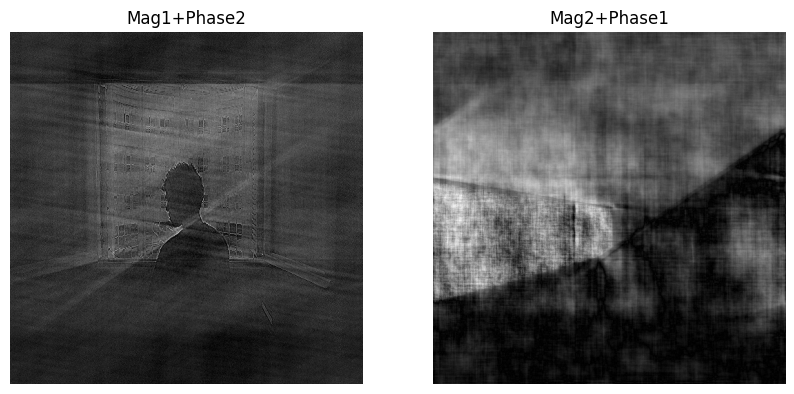

In [10]:
# applying fft to grayscaled image 1
f1=np.fft.fft2(x1)
fshift1=np.fft.fftshift(f1)
mag1=np.abs(fshift1)
phase1=np.angle(fshift1)
#applying fft to grayscaled image 2
f2=np.fft.fft2(y1)
fshift2=np.fft.fftshift(f2)
mag2=np.abs(fshift2)
phase2=np.angle(fshift2)
#this is the main part asked in question where we swap magnitudes and phases(note: phase is first converted to complex number)
combined_1=mag1*np.exp(1j*phase2)
combined_2=mag2*np.exp(1j*phase1)
#applying inverse fft to reconstruct image 1
f_ishift_1=np.fft.ifftshift(combined_1)
img_swap_1=np.fft.ifft2(f_ishift_1)
img_swap_1=np.abs(img_swap_1)
#applying inverse fft to reconstruct image 2
f_ishift_2=np.fft.ifftshift(combined_2)
img_swap_2=np.fft.ifft2(f_ishift_2)
img_swap_2=np.abs(img_swap_2)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_swap_1,cmap='gray')
plt.title("Mag1+Phase2")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(img_swap_2,cmap='gray')
plt.title("Mag2+Phase1")
plt.axis('off')
plt.tight_layout
plt.show()
# yes mag1+phase2 is nearli image2 so this proves that phase describes structure and magnitude decides texture.
